In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import mplfinance as mpf
import matplotlib.dates as mdates
import numpy as np

### Reading of the file and making the data of a correct type

In [151]:
mx = pd.read_csv("C:\\PyCharm\\Projects\\CELA\\tinkoffApi\\moex.csv")
sp = pd.read_csv("C:\\PyCharm\\Projects\\CELA\\tinkoffApi\\spb.csv")

In [12]:
mx = pd.read_csv("C:\\PyCharm\\Projects\\CELA\\tinkoffApi\\sber_mx.csv")
sp = pd.read_csv("C:\\PyCharm\\Projects\\CELA\\tinkoffApi\\sber_sp.csv")

In [158]:
mx = pd.read_csv("C:\\PyCharm\\Projects\\CELA\\tinkoffApi\\mgnt_mx.csv")
sp = pd.read_csv("C:\\PyCharm\\Projects\\CELA\\tinkoffApi\\mgnt_sp.csv")

In [60]:
ob = pd.read_csv("C:\\PyCharm\\Projects\\CELA\\tinkoffApi\\OrderBook.csv", sep=';')

In [61]:
ob.tail()

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
2024806,2024807,CBOM,S,184459892439,31634,0,5.207,62300,NaN,NaN
2024807,2024808,CBOM,S,184459892738,31635,0,5.211,87600,NaN,NaN
2024808,2024809,CBOM,S,184459893066,31639,0,5.215,41900,NaN,NaN
2024809,2024810,PIKK,B,184459893376,859457,0,374.000,1250,NaN,NaN
2024810,2024811,PIKK,S,184459893668,859458,0,377.300,1250,NaN,NaN


In [159]:
mx = mx.drop(columns = ['Unnamed: 0'], axis=1)
sp = sp.drop(columns = ['Unnamed: 0'], axis=1)

In [160]:
df = mx.copy(deep=True)
df2 = sp.copy(deep=True)

In [161]:
mx['time'] = pd.to_datetime(mx['time'].astype(str), dayfirst=True)
sp['time'] = pd.to_datetime(sp['time'].astype(str), dayfirst=True)

# I. Качество инструмента

### Price fluctuation

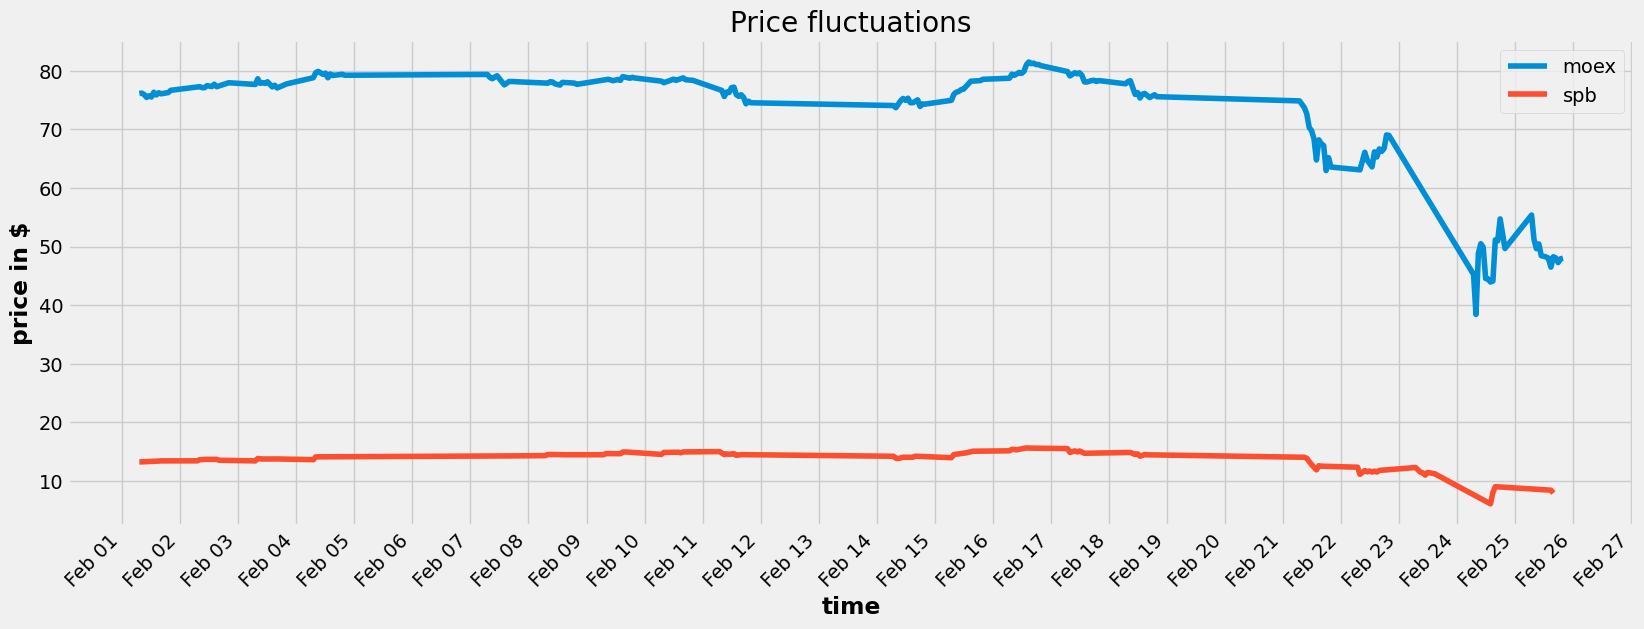

In [162]:
# price fluctuation during the month
plt.figure(figsize=(18, 6))


plt.plot(mx['time'], mx['close'], label='moex')
plt.plot(sp['time'], sp['close'], label='spb')

#res['difference'] = res['close_x'] - res['close_y']
#plt.plot(res['time'], res['difference'], label='diff')

plt.xlabel('time')
plt.ylabel('price in $')
plt.title("Price fluctuations")

#plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.grid(True)




plt.legend()
plt.grid(True)
plt.show()

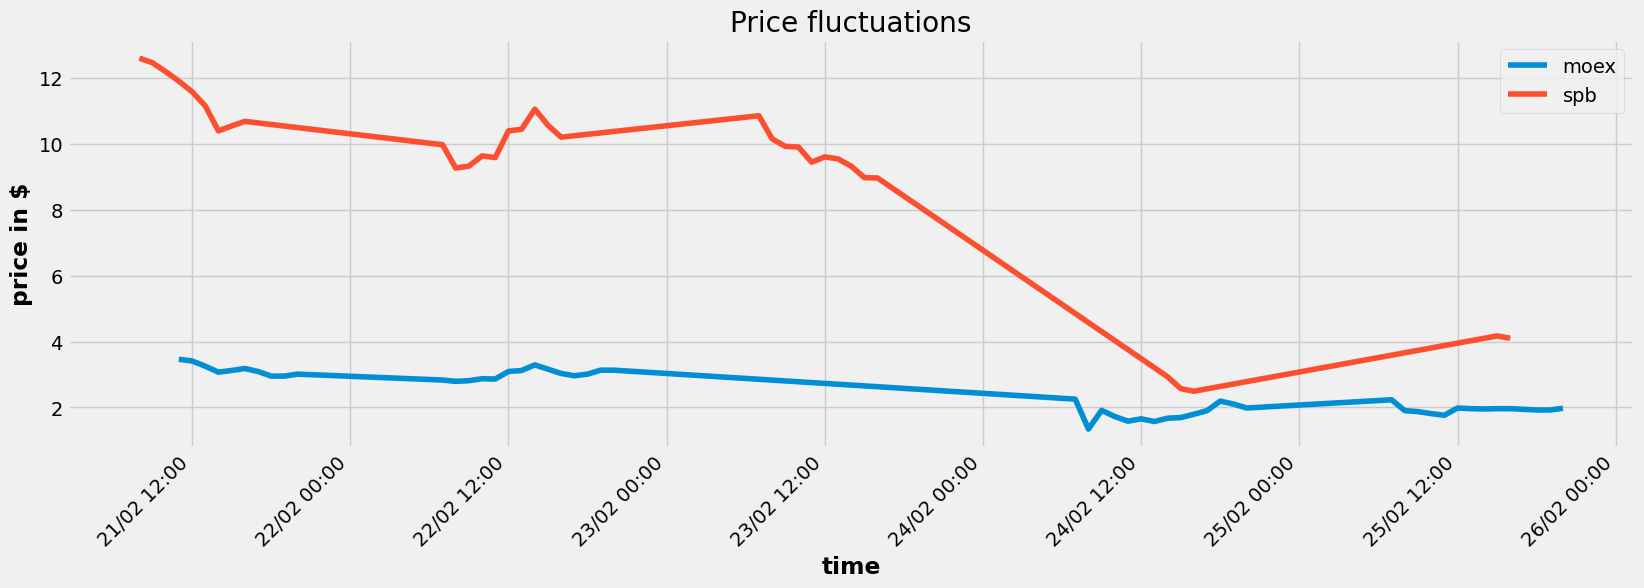

In [22]:
plt.figure(figsize=(18, 6))
n = 200
k = 60
plt.plot(mx['time'][n:], mx['close'][n:], label='moex')
plt.plot(sp['time'][n-k:], sp['close'][n-k:], label='spb')

plt.xlabel('time')
plt.ylabel('price in $')
plt.title("Price fluctuations")

plt.gcf().autofmt_xdate()
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d/%m %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#plt.grid(True)
plt.legend()
plt.show()

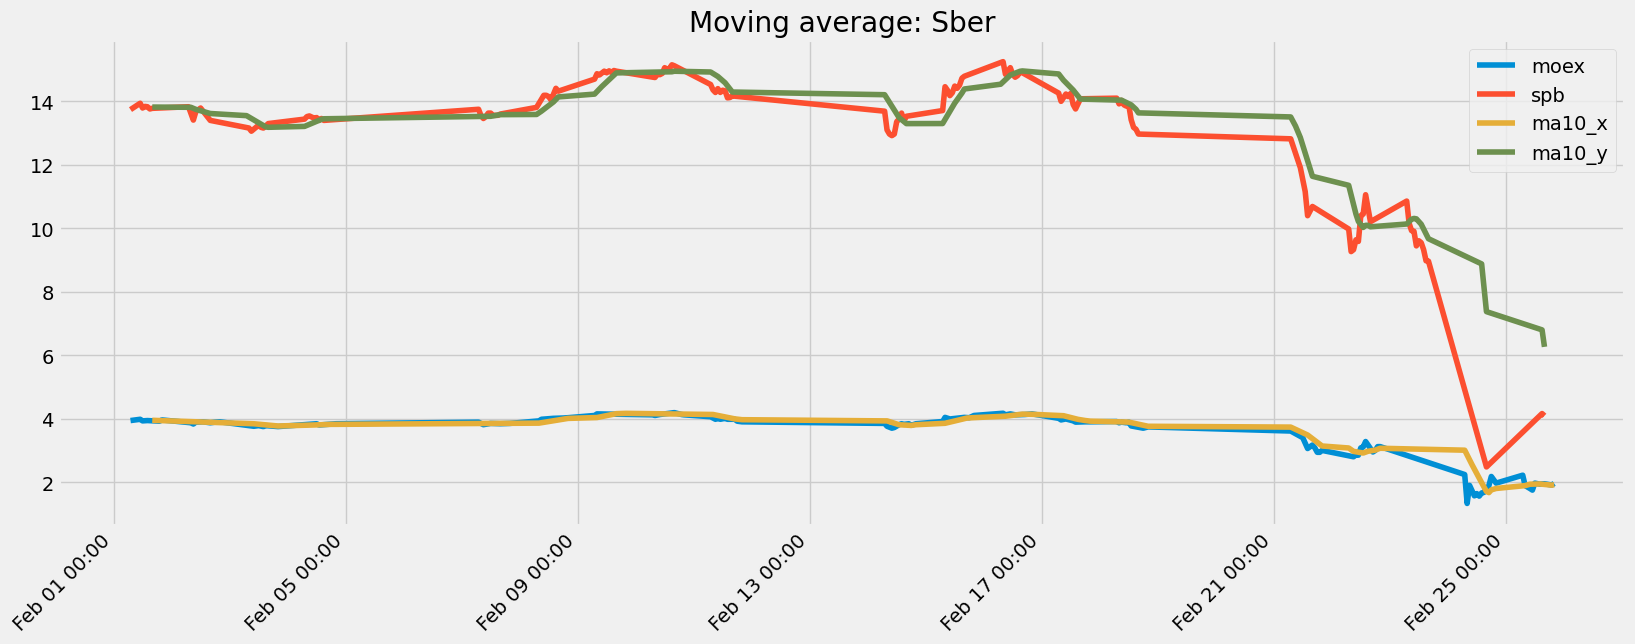

In [23]:
# Срванение средних
# Видно, что большую часть времени оба рынка находились под скользящей средней, то есть были "медвежьими"
#Наиболее простой является стратегия, при которой инструмент покупается при условии, что график цены пересекает свою скользящую среднюю снизу вверх, и продаётся, когда график цены пересекает график скользящей средней сверху вниз. И то и другое явление называют пробоем.
#Кроме того, полагают, что если линия графика цены находится выше скользящей средней, то рынок считается «бычьим», на котором можно покупать, а если наоборот — «медвежьим», предпочтительным для продажи.
plt.figure(figsize=(18, 6))
plt.plot(mx['time'], mx['close'], label='moex')
plt.plot(sp['time'], sp['close'], label='spb')
plt.plot(mx['time'], mx['close'].rolling(10).mean(), label='ma10_x')
plt.plot(sp['time'], sp['close'].rolling(10).mean(), label='ma10_y')

plt.title('Moving average: Sber')
plt.legend()

#plt.gcf().autofmt_xdate()
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#plt.grid(True)
plt.show()

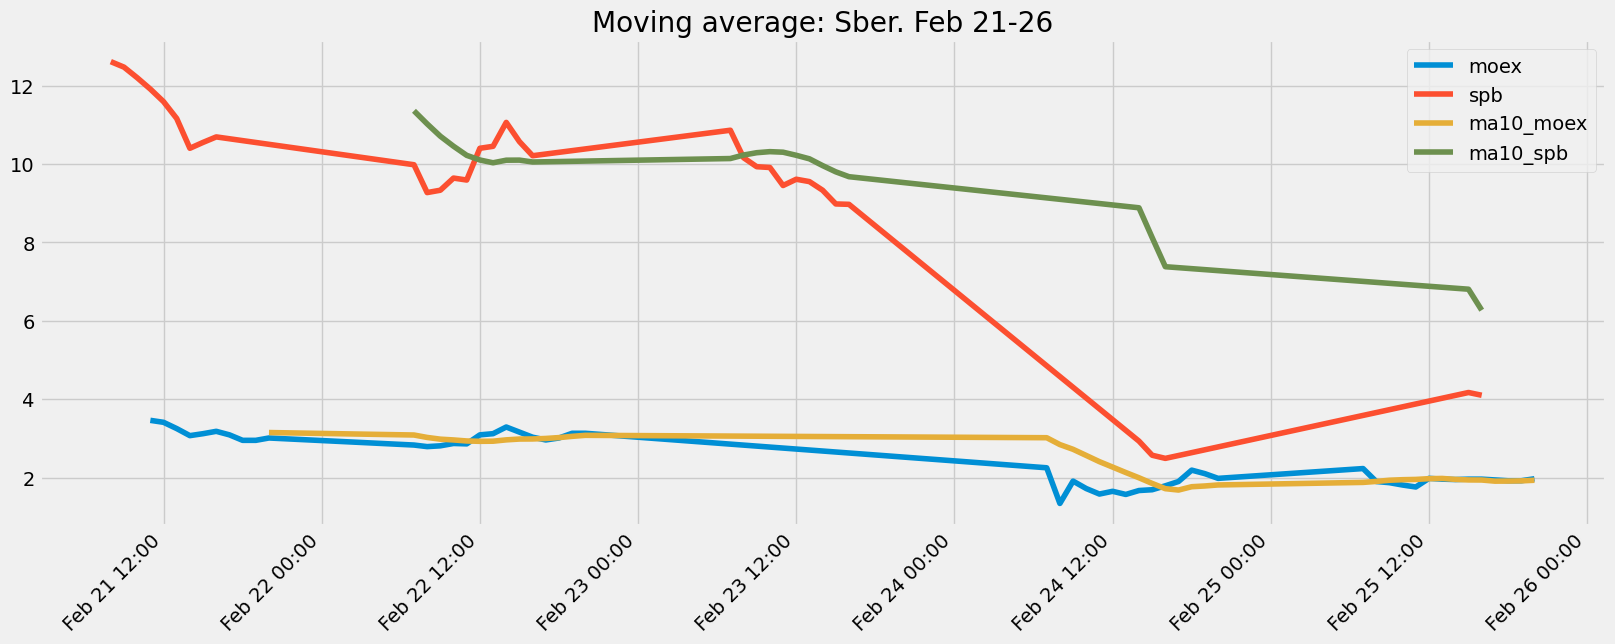

In [24]:
plt.figure(figsize=(18, 6))
n = 200
k = 60
plt.plot(mx['time'][n:], mx['close'][n:], label='moex')
plt.plot(sp['time'][n-k:], sp['close'][n-k:], label='spb')
plt.plot(mx['time'][n:], mx['close'][n:].rolling(10).mean(), label='ma10_moex')
plt.plot(sp['time'][n-k:], sp['close'][n-k:].rolling(10).mean(), label='ma10_spb')

plt.title('Moving average: Sber. Feb 21-26')
plt.legend()

#plt.gcf().autofmt_xdate()
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#plt.grid(True)
plt.show()

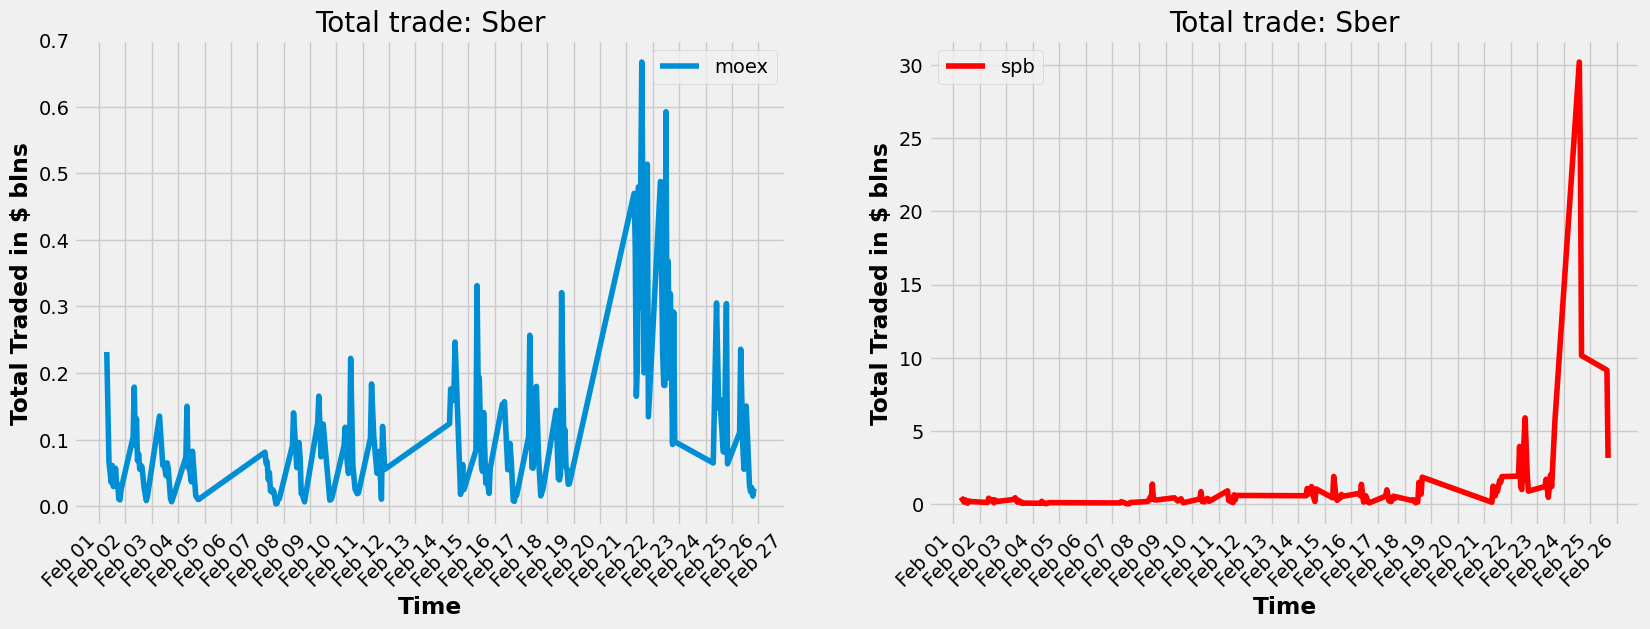

In [157]:
#Оборот по акциям
plt.figure(figsize=(18, 6))
mx['total_trade'] = mx['open']*mx['volume'] / 1000000
sp['total_trade'] = sp['open']*sp['volume'] / 1000000

plt.subplot(1, 2, 1)
plt.plot(mx['time'], mx['total_trade'], label='moex')
plt.legend()
plt.ylabel('Total Traded in $ blns')
plt.xlabel('Time')
plt.title('Total trade: Sber')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.subplot(1, 2, 2)
plt.plot(sp['time'], sp['total_trade'], label='spb', color='red')
plt.legend()
plt.ylabel('Total Traded in $ blns')
plt.xlabel('Time')
plt.title('Total trade: Sber')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.show()

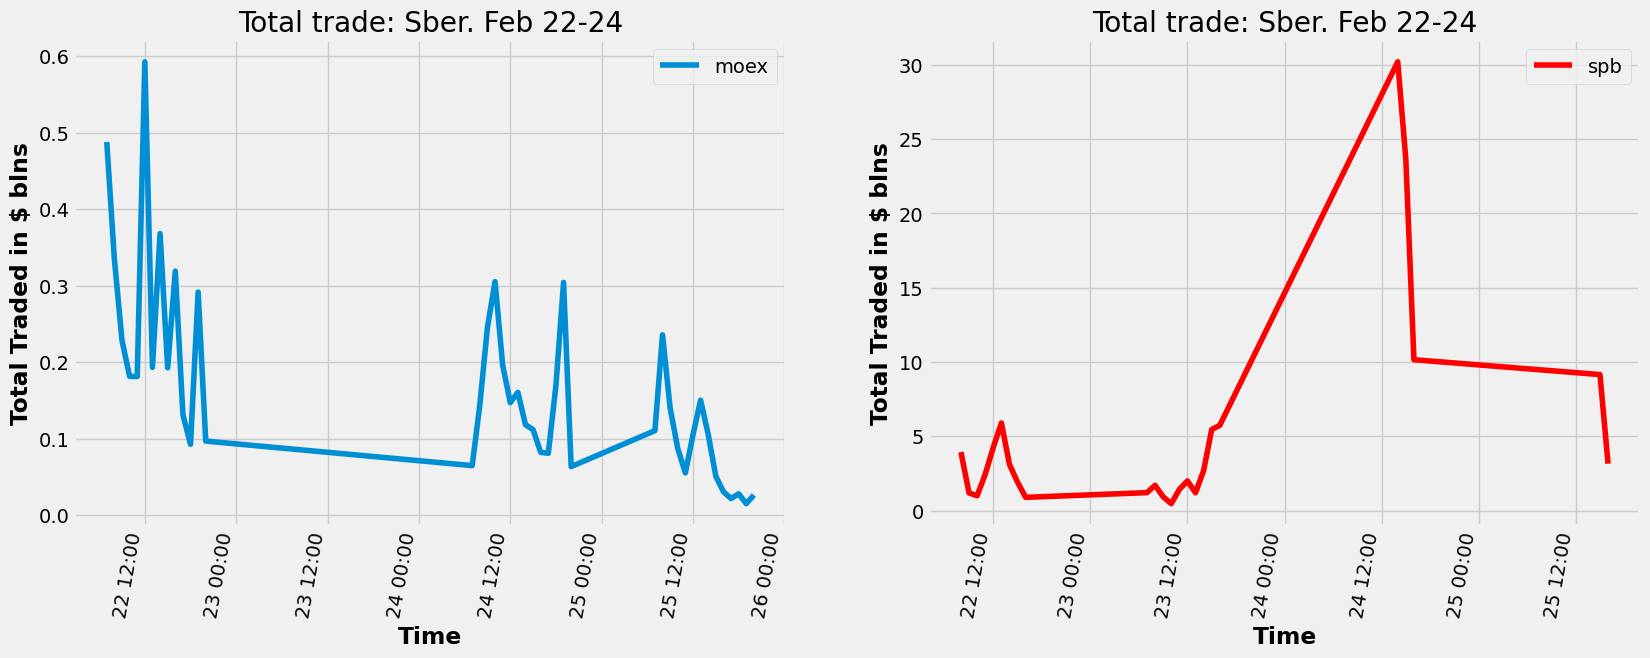

In [153]:
#Оборот по акциям в сжатый период
plt.figure(figsize=(18, 6))
n=210
k = 60
plt.subplot(1, 2, 1)
plt.plot(mx['time'][n:], mx['total_trade'][n:], label='moex')
plt.legend()
plt.ylabel('Total Traded in $ blns')
plt.xlabel('Time')
plt.title('Total trade: Sber. Feb 22-24')
plt.grid(True)
#plt.gca().xaxis.set_major_locator(mdates.DAyLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=80, ha="right")

plt.subplot(1, 2, 2)
plt.plot(sp['time'][n-k:], sp['total_trade'][n-k:], label='spb', color='red')
plt.legend()
plt.ylabel('Total Traded in $ blns')
plt.xlabel('Time')
plt.title('Total trade: Sber. Feb 22-24')
plt.grid(True)
#plt.gca().xaxis.set_major_locator(mdates.DAyLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=80, ha="right")

plt.show()

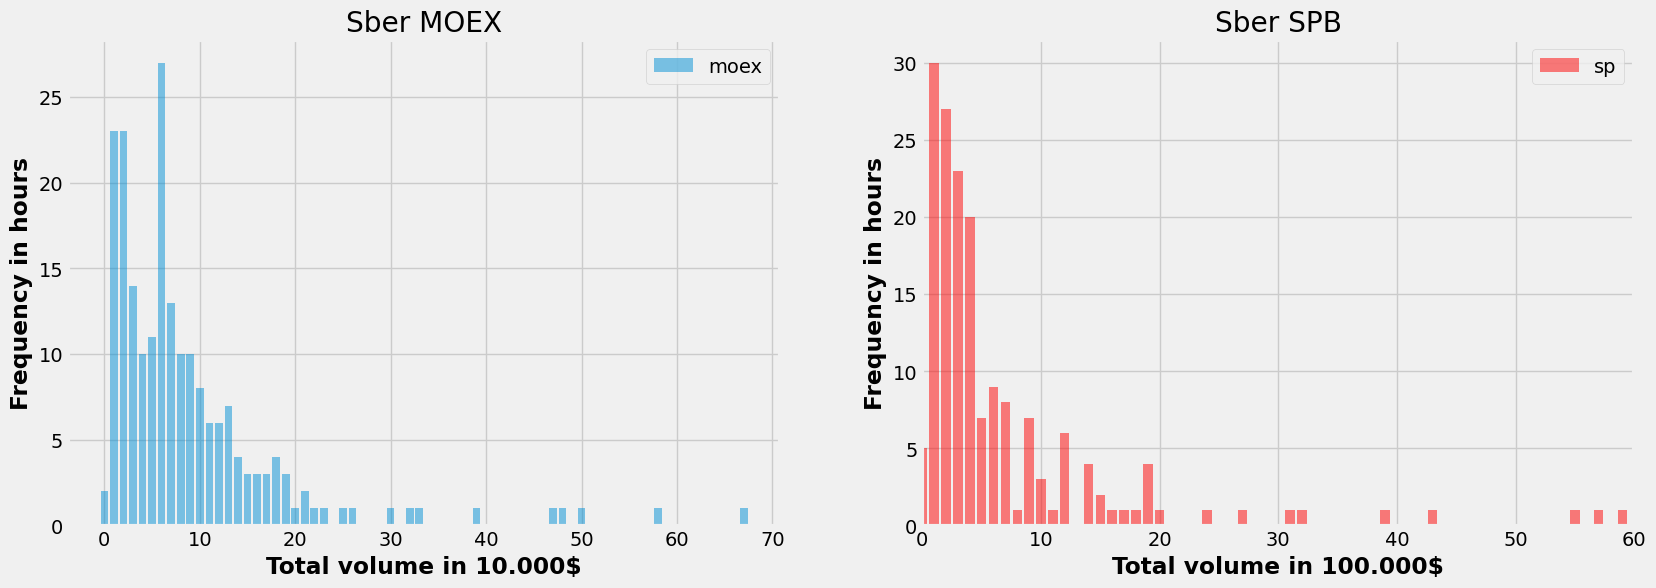

In [27]:
# Частотный анализ оборота по акциям
from collections import Counter

plt.figure(figsize=(18, 6))
mx['total_trade_new'] = mx['open']*mx['volume']
sp['total_trade_new'] = sp['open']*sp['volume']
n = 1

mx['total_trade_new'] = round(mx['total_trade_new']/10000)
sp['total_trade_new'] = round(sp['total_trade_new']/100000)


rec_mx = Counter(mx['total_trade_new'][:206])
rec_sp = Counter(sp['total_trade_new'][:206])

plt.subplot(1, 2, 1)
plt.bar(rec_mx.keys(), rec_mx.values(), label='moex', alpha=0.5)
plt.legend()
#plt.xlim([0, 20])
plt.ylabel('Frequency in hours')
plt.xlabel('Total trade in 10.000$')
plt.title('Sber MOEX')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(rec_sp.keys(), rec_sp.values(), label='sp', alpha=0.5, color='red')


plt.legend()
plt.xlim([0, 60])
plt.ylabel('Frequency in hours')
plt.xlabel('Total trade in 100.000$')
plt.title('Sber SPB')
plt.grid(True)

#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
#plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.show()
#print(recounted)

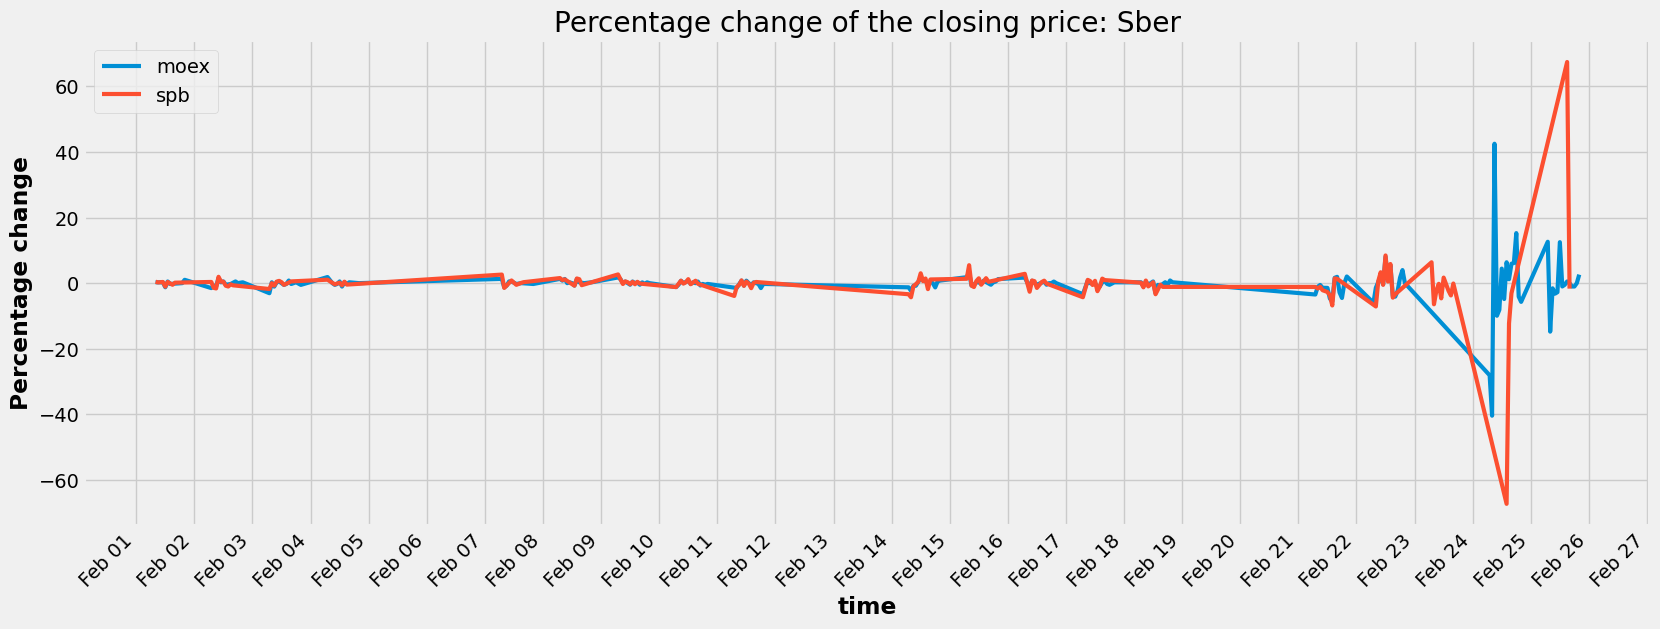

In [28]:
# процентные измненеия день ко дню
mx['change'] = mx.close.pct_change()*100
sp['change'] = sp.close.pct_change()*100
plt.figure(figsize=(18, 6))

#plt.subplot(1, 2, 1)

plt.plot(mx['time'], mx['change'], label='moex', alpha=1, linewidth=3)
plt.plot(sp['time'], sp['change'], label='spb', alpha=1, linewidth=3)

plt.legend()
plt.ylabel('Percentage change')
plt.xlabel('time')
plt.title('Percentage change of the closing price: Sber')
#plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#plt.subplot(1, 2, 2)
plt.show()

In [29]:
mx['change'].max()

42.5373134328358

In [30]:
pct_change_mx = mx['close'] / mx['close'].shift(1) - 1
pct_change_sp = sp['close'] / sp['close'].shift(1) - 1


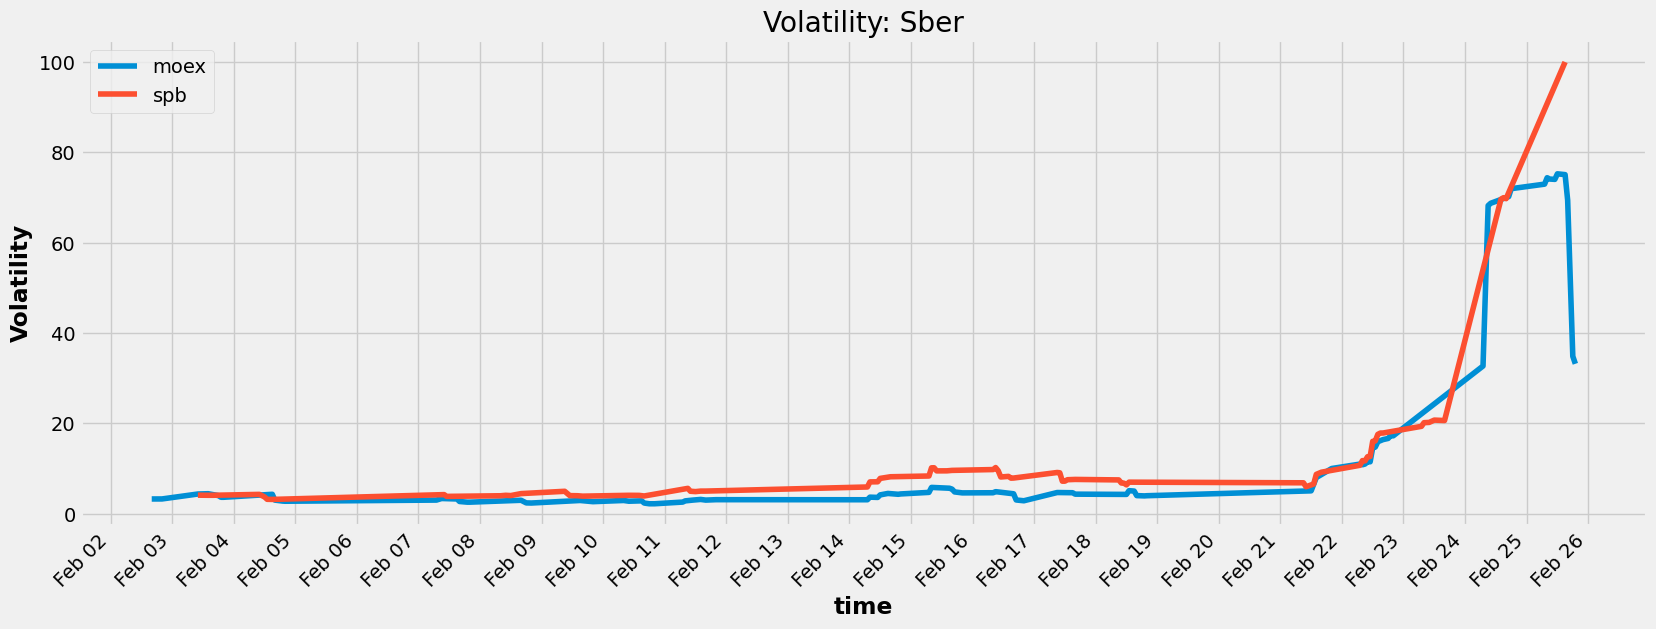

In [40]:
# Определяю рассматриваемый период

min_periods = 23
plt.figure(figsize=(18, 6))
# Вычисляю волатильность
n = 200
k = 140
vol = (mx['change'][:n]).rolling(min_periods).std() * np.sqrt(min_periods) 
vol2 = (sp['change'][:k]).rolling(min_periods).std() * np.sqrt(min_periods) 
# Строю график
plt.plot(mx['time'][:n], vol, label='moex')
plt.plot(sp['time'][:k], vol2, label='spb')


plt.ylabel('Volatility')
plt.xlabel('time')
plt.title('Volatility: Sber')
#plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.show()

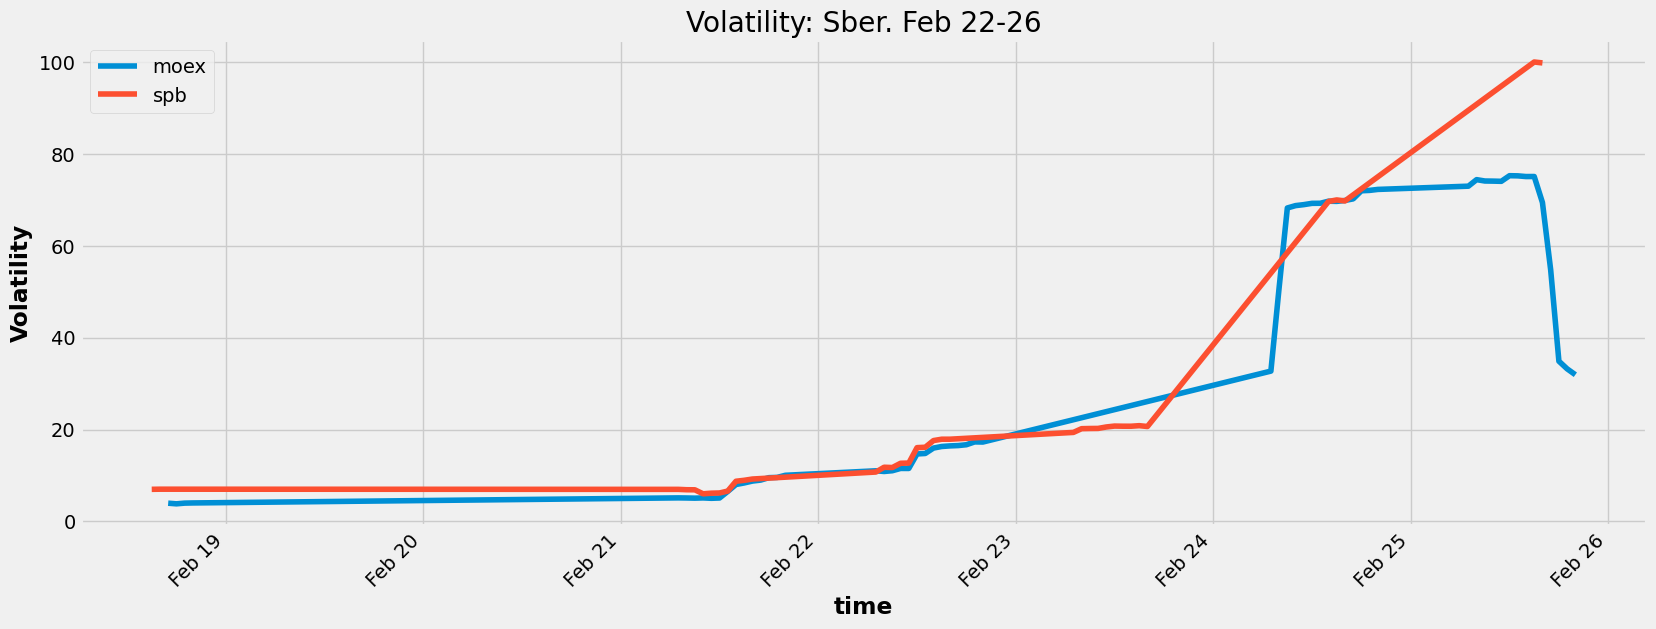

In [46]:
# Определяю рассматриваемый период
min_periods = 23
plt.figure(figsize=(18, 6))
# Вычисляю волатильность
n = 170
k = 55
vol = (mx['change'][n:]).rolling(min_periods).std() * np.sqrt(min_periods) 
vol2 = (sp['change'][n-k:]).rolling(min_periods).std() * np.sqrt(min_periods) 
# Строю график
plt.plot(mx['time'][n:], vol, label='moex')
plt.plot(sp['time'][n-k:], vol2, label='spb')


plt.ylabel('Volatility')
plt.xlabel('time')
plt.title('Volatility: Sber. Feb 22-26')
#plt.grid(True)
plt.legend()
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.show()

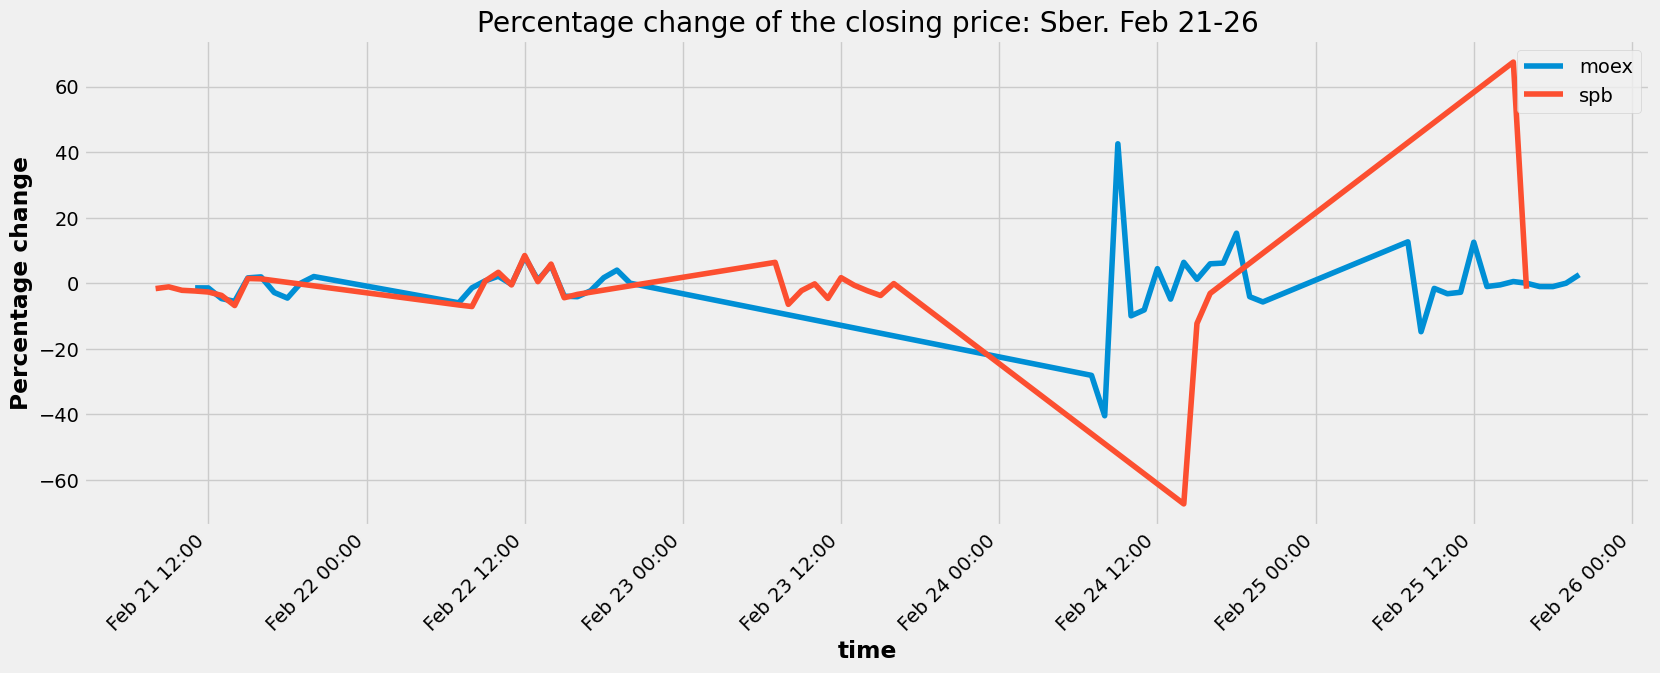

In [33]:
plt.figure(figsize=(18, 6))
n=200
k = 60
plt.plot(mx['time'][n:], mx['change'][n:], label='moex', alpha=1)
plt.plot(sp['time'][n-k:], sp['change'][n-k:], label='spb', alpha=1)

plt.legend()
plt.ylabel('Percentage change')
plt.xlabel('time')
plt.title('Percentage change of the closing price: Sber. Feb 21-26')
#plt.grid(True)

#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.show()

In [34]:
mx.tail(20)

,time,volume,open,close,high,low,total_trade,total_trade_new,change
232,2022-02-24 15:00:00+00:00,66590.93,1.68,1.69,1.72,1.57,0.111873,11.0,1.197605
233,2022-02-24 16:00:00+00:00,48655.47,1.69,1.79,1.84,1.64,0.082228,8.0,5.917160
234,2022-02-24 17:00:00+00:00,45279.60,1.79,1.90,1.94,1.69,0.081050,8.0,6.145251
235,2022-02-24 18:00:00+00:00,89375.29,1.90,2.19,2.19,1.88,0.169813,17.0,15.263158
236,2022-02-24 19:00:00+00:00,138943.94,2.19,2.10,2.39,1.83,0.304287,30.0,-4.109589
237,2022-02-24 20:00:00+00:00,30295.17,2.10,1.98,2.10,1.97,0.063620,6.0,-5.714286
238,2022-02-25 07:00:00+00:00,59130.21,1.87,2.23,2.29,1.86,0.110573,11.0,12.626263
239,2022-02-25 08:00:00+00:00,105261.74,2.24,1.90,2.25,1.87,0.235786,24.0,-14.798206
240,2022-02-25 09:00:00+00:00,73692.14,1.90,1.87,1.94,1.81,0.140015,14.0,-1.578947
241,2022-02-25 10:00:00+00:00,46751.20,1.87,1.81,1.87,1.77,0.087425,9.0,-3.208556


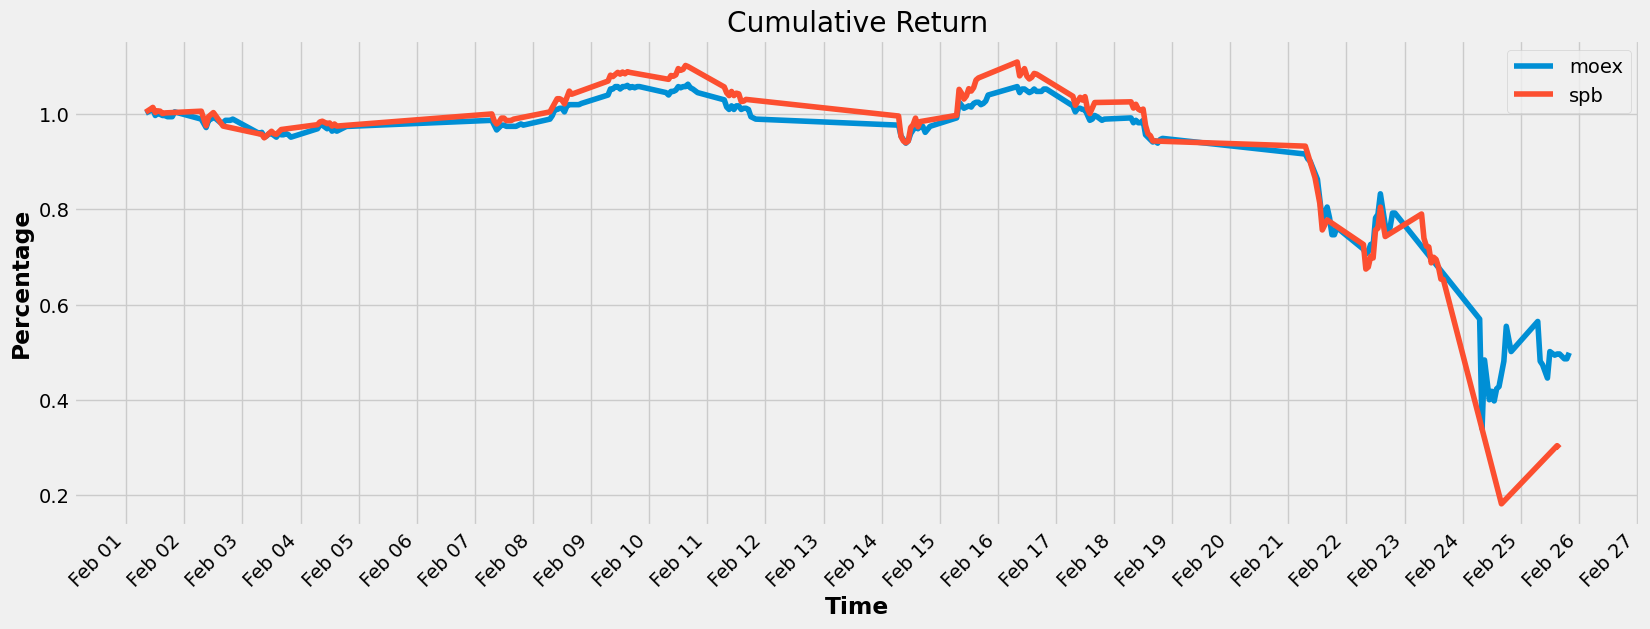

In [35]:
# Анализ накопленного дохода
#Анализ накопленного дохода. Изменения цены акции в процентах от 1
plt.figure(figsize=(18, 6))

mx['returns']=(mx['close'] / mx['close'].shift(1))-1
sp['returns']=(sp['close'] / sp['close'].shift(1))-1

mx['Cumulative Return'] = (1+ mx['returns']).cumprod()
sp['Cumulative Return'] = (1+ sp['returns']).cumprod()

plt.plot(mx['time'], mx['Cumulative Return'], label='moex')
plt.plot(sp['time'], sp['Cumulative Return'], label='spb')

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.title('Cumulative Return')
plt.ylabel('Percentage')
plt.xlabel('Time')

plt.legend()
plt.show()

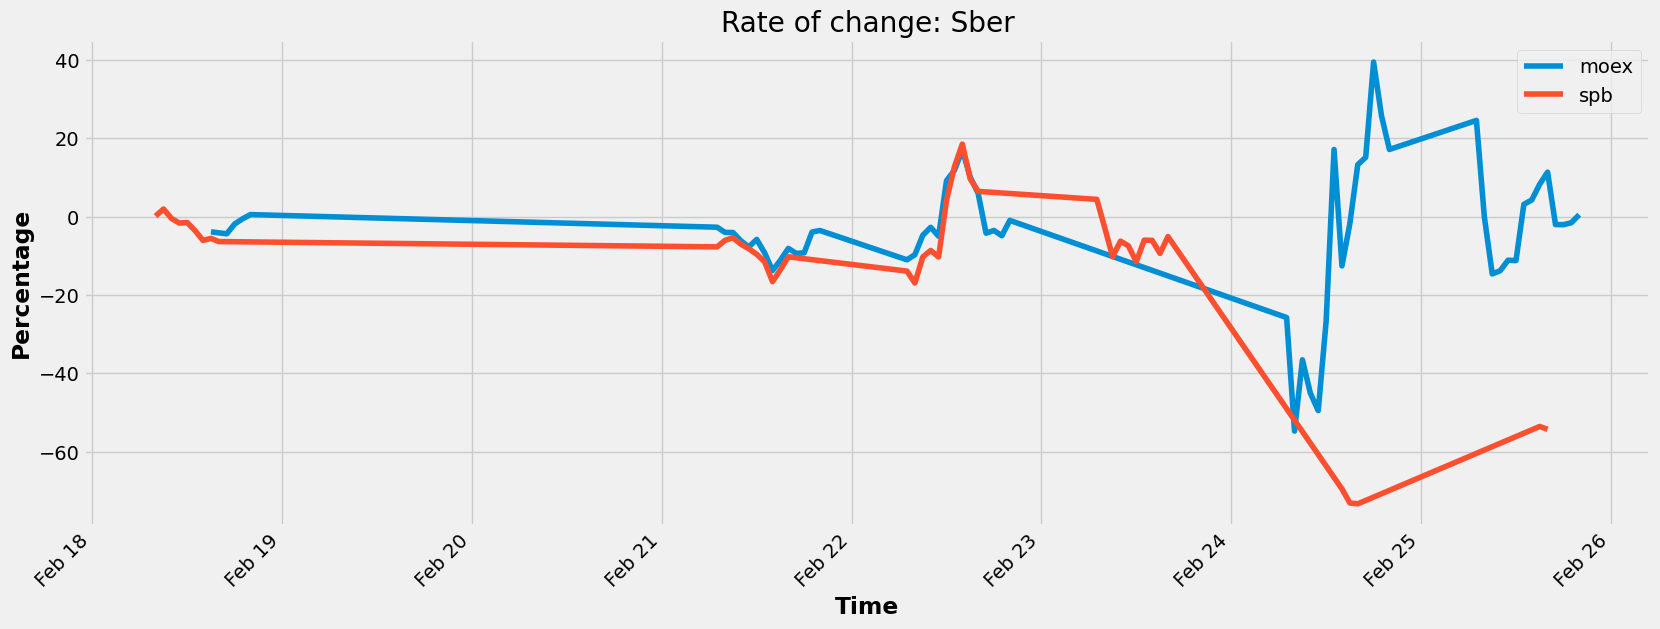

In [36]:
#Rate of Change такова: 100*((Цс-Цn)/ Цn), где Цс — текущая цена, а Цn — цена закрытия n периодов назад
# Если Rate of Change выше нуля, то быки сильны и более целесообразно покупать, если Rate of Change ниже нуля, то у руля медведи и более выгодными будут продажи.
# https://journal.open-broker.ru/trading/roc/
plt.figure(figsize=(18, 6))
n = 190
k = 60
mx['roc']=100 * ((mx['close'] - mx['close'].shift(5)) / (mx['close'].shift(5)))
sp['roc']=100 * ((sp['close'] - sp['close'].shift(5)) / (sp['close'].shift(5)))
#sp['roc']=(sp['close'] / sp['close'].shift(1))-1
plt.plot(mx['time'][n:], mx['roc'][n:], label='moex')
plt.plot(sp['time'][n-k:], sp['roc'][n-k:], label='spb')


plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.title('Rate of change: Sber')
plt.ylabel('Percentage')
plt.xlabel('Time')

plt.grid(True)
plt.legend()
plt.show()

In [37]:
#! pip install mplfinance

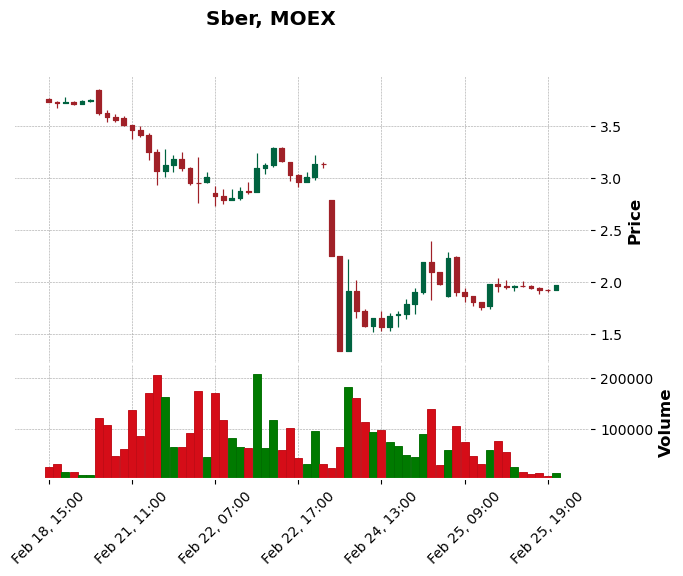

In [38]:
import pandas

#import matplotlib
#import yfinance as yf
import seaborn as sns
#import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
n = 190
k = 60
df.index = pd.DatetimeIndex(df['time'])
df2.index = pd.DatetimeIndex(df2['time'])
%matplotlib inline
mpf.plot(df[n:], type='candle', title='Sber, MOEX', volume=True, style='charles')
plt.style.use('fivethirtyeight')  

# Comparison

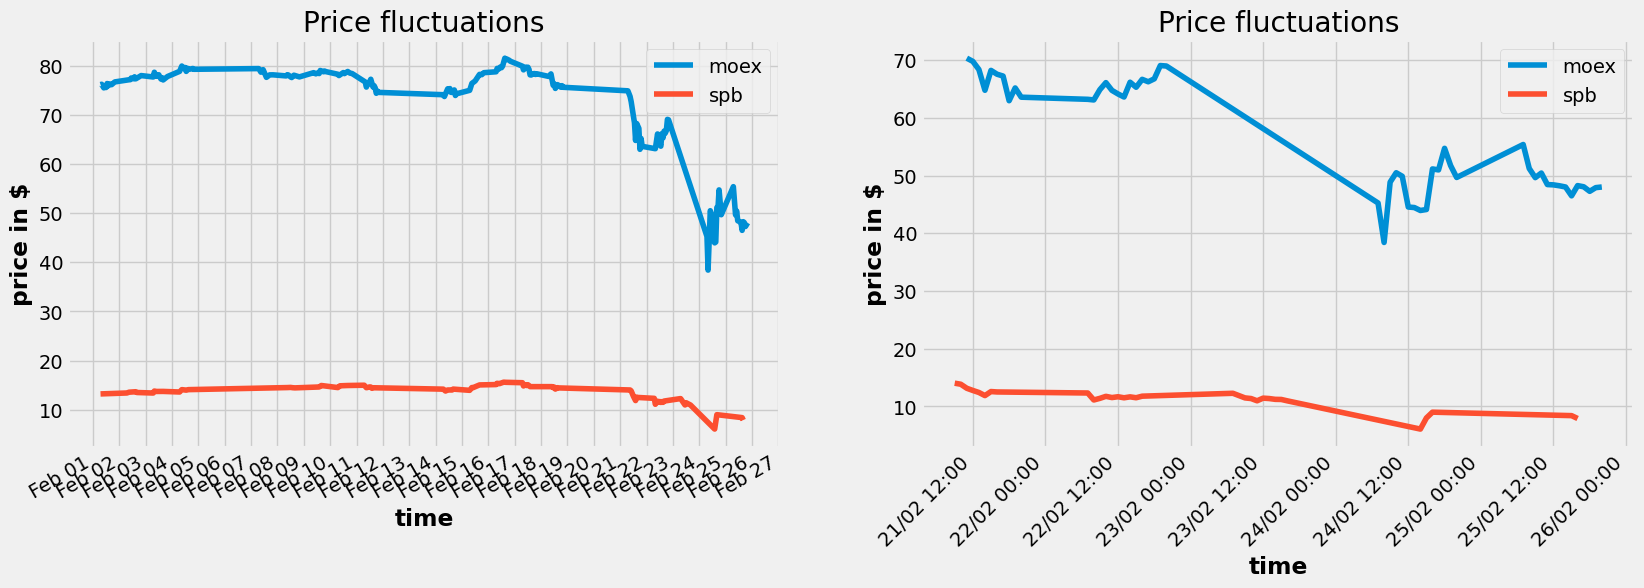

In [165]:
# price fluctuation during the month
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(mx['time'], mx['close'], label='moex')
plt.plot(sp['time'], sp['close'], label='spb')

#res['difference'] = res['close_x'] - res['close_y']
#plt.plot(res['time'], res['difference'], label='diff')

plt.xlabel('time')
plt.ylabel('price in $')
plt.title("Price fluctuations")

#plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.grid(True)

plt.legend()

plt.subplot(1, 2, 2)
n = 200
k = 60
plt.plot(mx['time'][n:], mx['close'][n:], label='moex')
plt.plot(sp['time'][n-k:], sp['close'][n-k:], label='spb')

plt.xlabel('time')
plt.ylabel('price in $')
plt.title("Price fluctuations, Mgnt")

plt.gcf().autofmt_xdate()
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d/%m %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#plt.grid(True)
plt.legend()
plt.show()


plt.show()

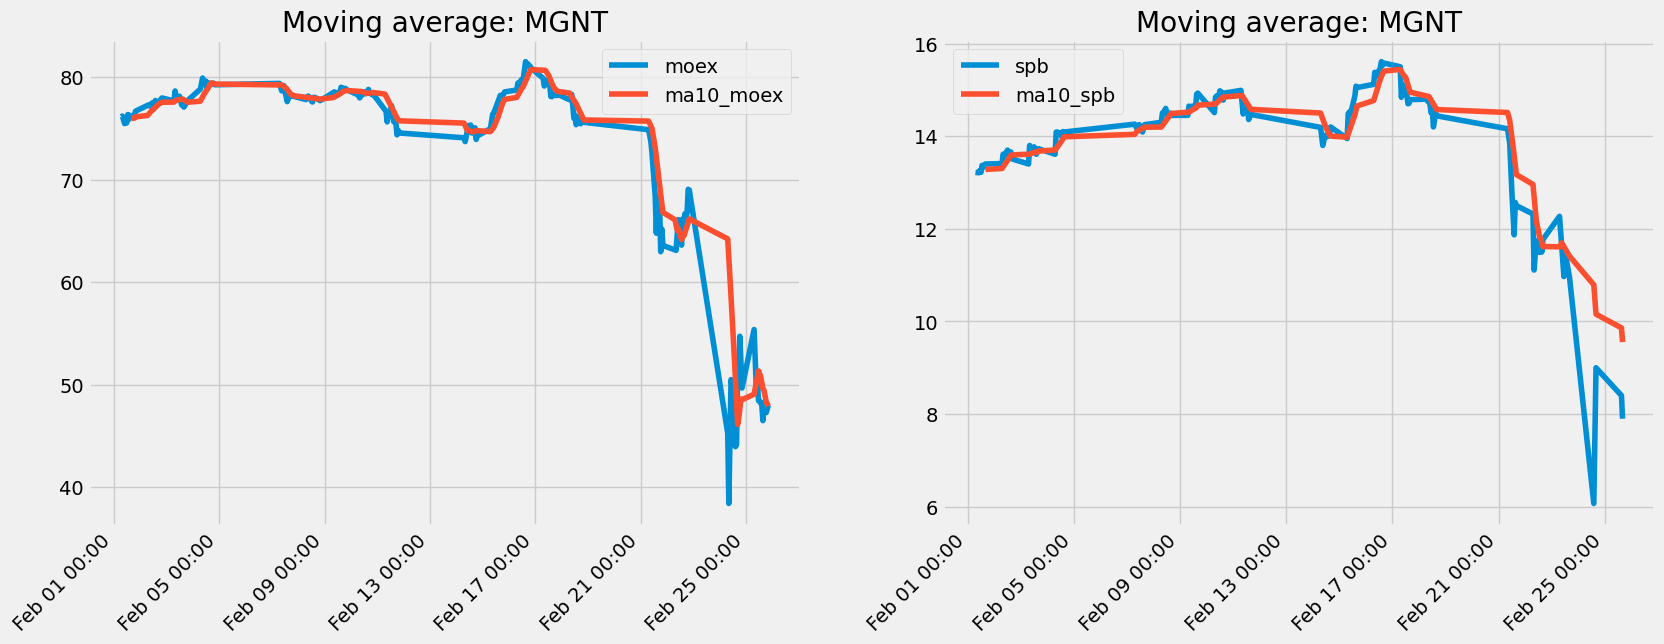

In [170]:
# Срванение средних
# Видно, что большую часть времени оба рынка находились под скользящей средней, то есть были "медвежьими"
#Наиболее простой является стратегия, при которой инструмент покупается при условии, что график цены пересекает свою скользящую среднюю снизу вверх, и продаётся, когда график цены пересекает график скользящей средней сверху вниз. И то и другое явление называют пробоем.
#Кроме того, полагают, что если линия графика цены находится выше скользящей средней, то рынок считается «бычьим», на котором можно покупать, а если наоборот — «медвежьим», предпочтительным для продажи.
plt.figure(figsize=(18, 6))



plt.subplot(1, 2, 1)
plt.plot(mx['time'], mx['close'], label='moex')
plt.plot(mx['time'], mx['close'].rolling(10).mean(), label='ma10_moex')
plt.title('Moving average: MGNT')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.subplot(1, 2, 2)
plt.plot(sp['time'], sp['close'], label='spb')
plt.plot(sp['time'], sp['close'].rolling(10).mean(), label='ma10_spb')

plt.title('Moving average: MGNT')
plt.legend()

#plt.gcf().autofmt_xdate()
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#plt.grid(True)
plt.show()

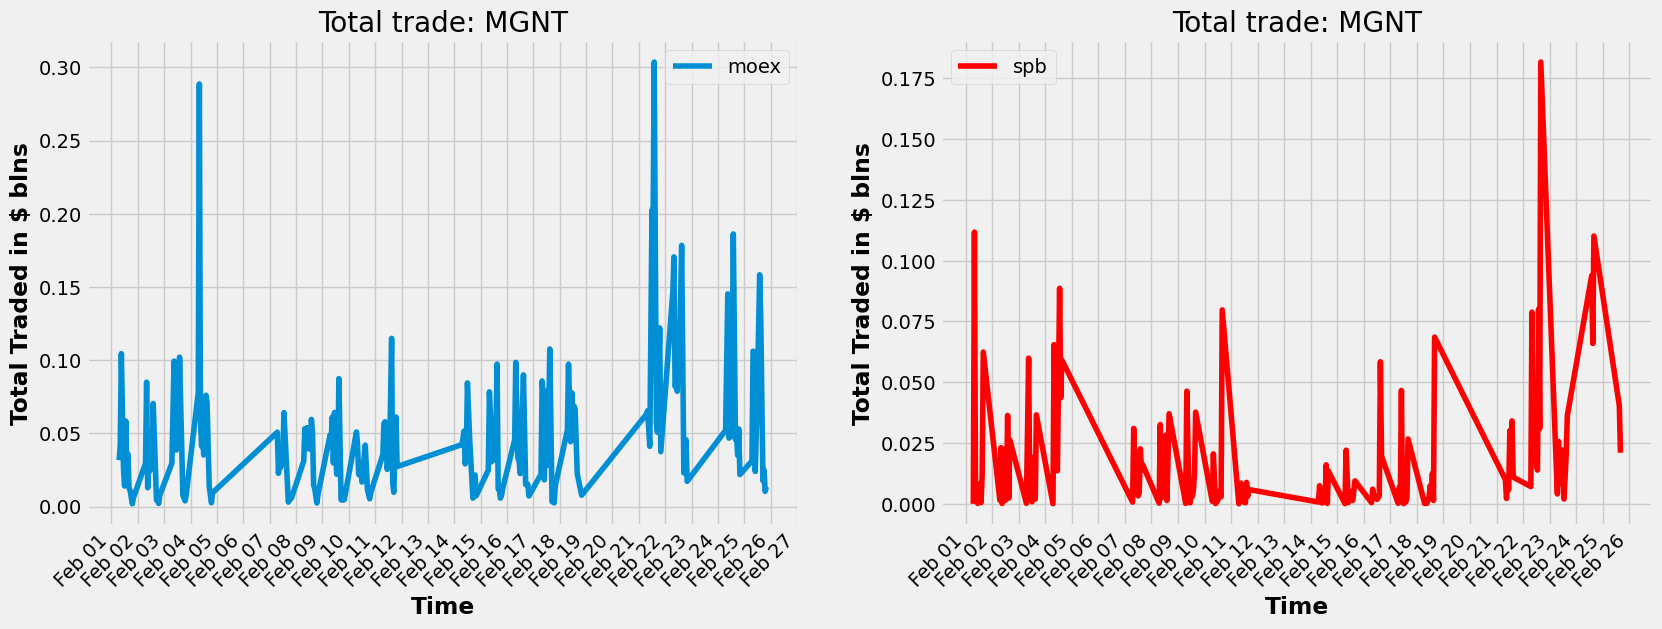

In [172]:
#Оборот по акциям
plt.figure(figsize=(18, 6))
mx['total_trade'] = mx['open']*mx['volume'] / 1000000
sp['total_trade'] = sp['open']*sp['volume'] / 1000000

plt.subplot(1, 2, 1)
plt.plot(mx['time'], mx['total_trade'], label='moex')
plt.legend()
plt.ylabel('Total Traded in $ blns')
plt.xlabel('Time')
plt.title('Total trade: MGNT')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.subplot(1, 2, 2)
plt.plot(sp['time'], sp['total_trade'], label='spb', color='red')
plt.legend()
plt.ylabel('Total Traded in $ blns')
plt.xlabel('Time')
plt.title('Total trade: MGNT')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.show()

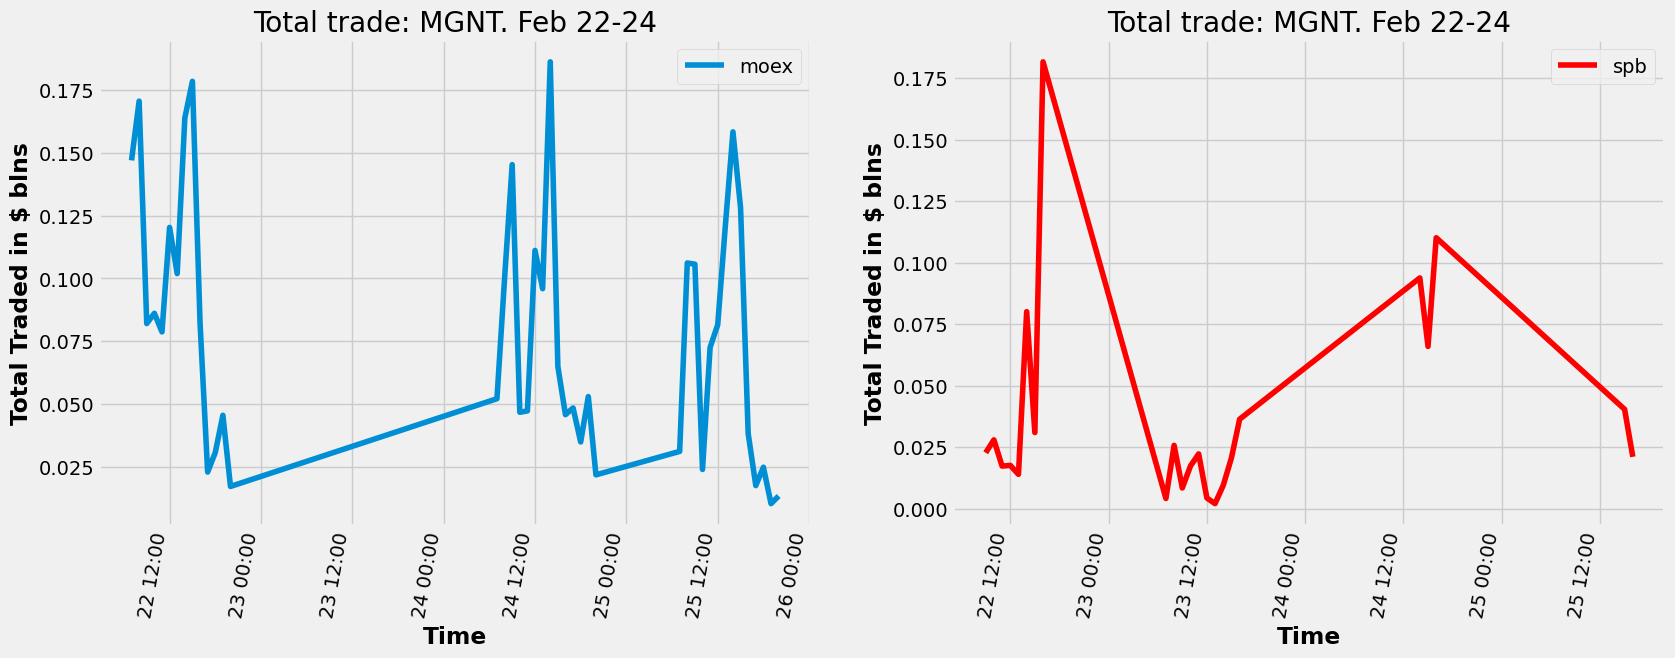

In [174]:
#Оборот по акциям в сжатый период
plt.figure(figsize=(18, 6))
n=210
k = 60
plt.subplot(1, 2, 1)
plt.plot(mx['time'][n:], mx['total_trade'][n:], label='moex')
plt.legend()
plt.ylabel('Total Traded in $ blns')
plt.xlabel('Time')
plt.title('Total trade: MGNT. Feb 22-24')
plt.grid(True)
#plt.gca().xaxis.set_major_locator(mdates.DAyLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=80, ha="right")

plt.subplot(1, 2, 2)
plt.plot(sp['time'][n-k:], sp['total_trade'][n-k:], label='spb', color='red')
plt.legend()
plt.ylabel('Total Traded in $ blns')
plt.xlabel('Time')
plt.title('Total trade: MGNT. Feb 22-24')
plt.grid(True)
#plt.gca().xaxis.set_major_locator(mdates.DAyLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %H:00"))
plt.setp(plt.gca().get_xticklabels(), rotation=80, ha="right")

plt.show()

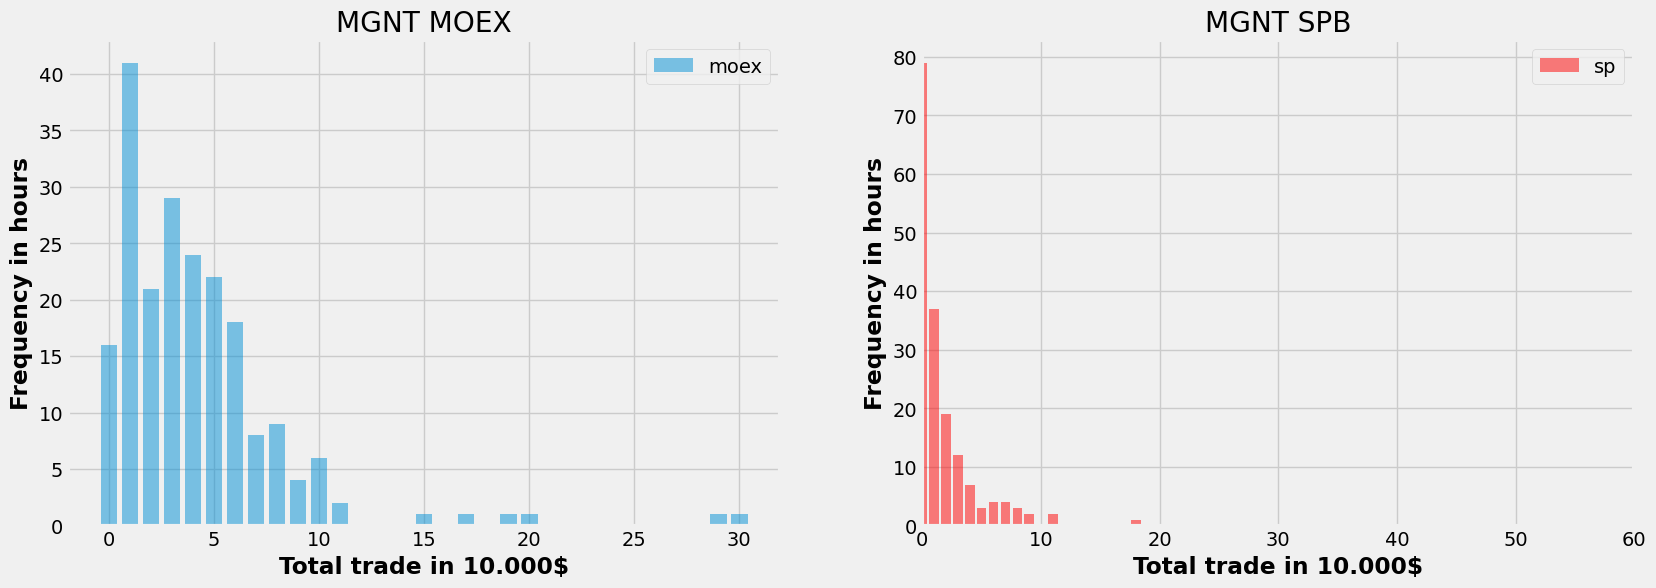

In [195]:
# Частотный анализ оборота по акциям
from collections import Counter

plt.figure(figsize=(18, 6))
mx['total_trade_new'] = mx['open']*mx['volume']
sp['total_trade_new'] = sp['open']*sp['volume']
n = 1

mx['total_trade_new'] = round(mx['total_trade_new']/10000)
sp['total_trade_new'] = round(sp['total_trade_new']/10000)


rec_mx = Counter(mx['total_trade_new'][:206])
rec_sp = Counter(sp['total_trade_new'][:206])

plt.subplot(1, 2, 1)
plt.bar(rec_mx.keys(), rec_mx.values(), label='moex', alpha=0.5)
plt.legend()
#plt.xlim([0, 20])
plt.ylabel('Frequency in hours')
plt.xlabel('Total trade in 10.000$')
plt.title('MGNT MOEX')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(rec_sp.keys(), rec_sp.values(), label='sp', alpha=0.5, color='red')


plt.legend()
plt.xlim([0, 60])
plt.ylabel('Frequency in hours')
plt.xlabel('Total trade in 10.000$')
plt.title('MGNT SPB')
plt.grid(True)

#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
#plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.show()
#print(recounted)

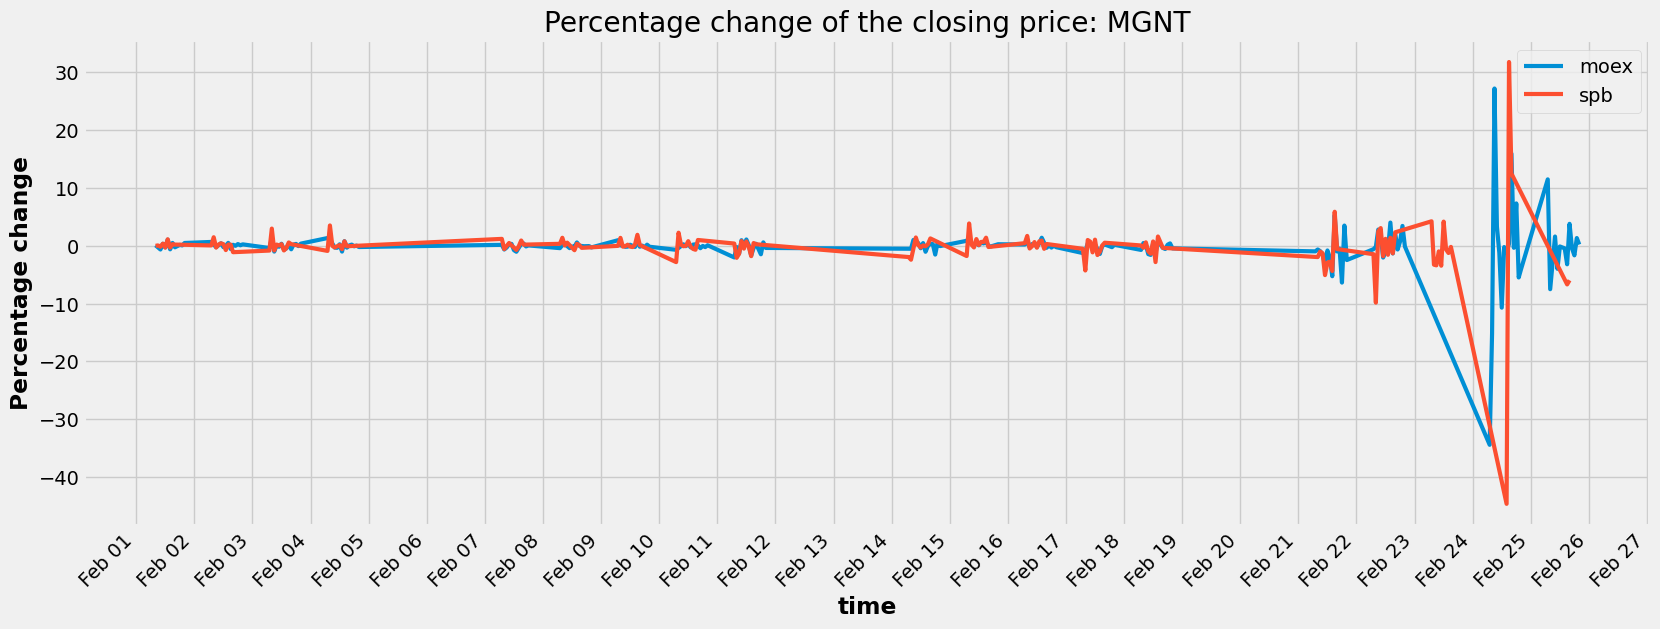

In [184]:
# процентные измненеия день ко дню
mx['change'] = mx.close.pct_change()*100
sp['change'] = sp.close.pct_change()*100
plt.figure(figsize=(18, 6))

#plt.subplot(1, 2, 1)

plt.plot(mx['time'], mx['change'], label='moex', alpha=1, linewidth=3)
plt.plot(sp['time'], sp['change'], label='spb', alpha=1, linewidth=3)

plt.legend()
plt.ylabel('Percentage change')
plt.xlabel('time')
plt.title('Percentage change of the closing price: MGNT')
#plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

#plt.subplot(1, 2, 2)
plt.show()

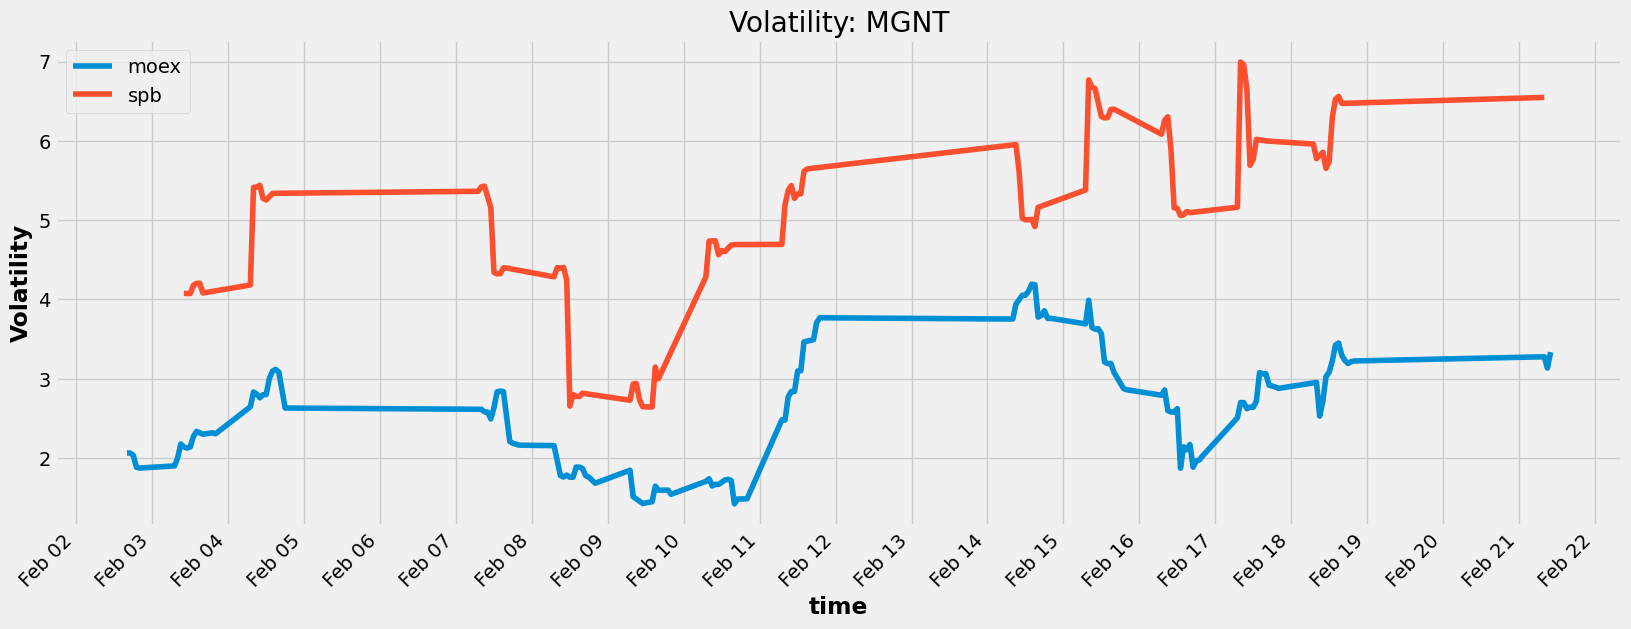

In [183]:
# Определяю рассматриваемый период

min_periods = 23
plt.figure(figsize=(18, 6))
# Вычисляю волатильность
n = 200
k = 140
vol = (mx['change'][:n]).rolling(min_periods).std() * np.sqrt(min_periods) 
vol2 = (sp['change'][:k]).rolling(min_periods).std() * np.sqrt(min_periods) 
# Строю график
plt.plot(mx['time'][:n], vol, label='moex')
plt.plot(sp['time'][:k], vol2, label='spb')


plt.ylabel('Volatility')
plt.xlabel('time')
plt.title('Volatility: MGNT')
#plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.show()

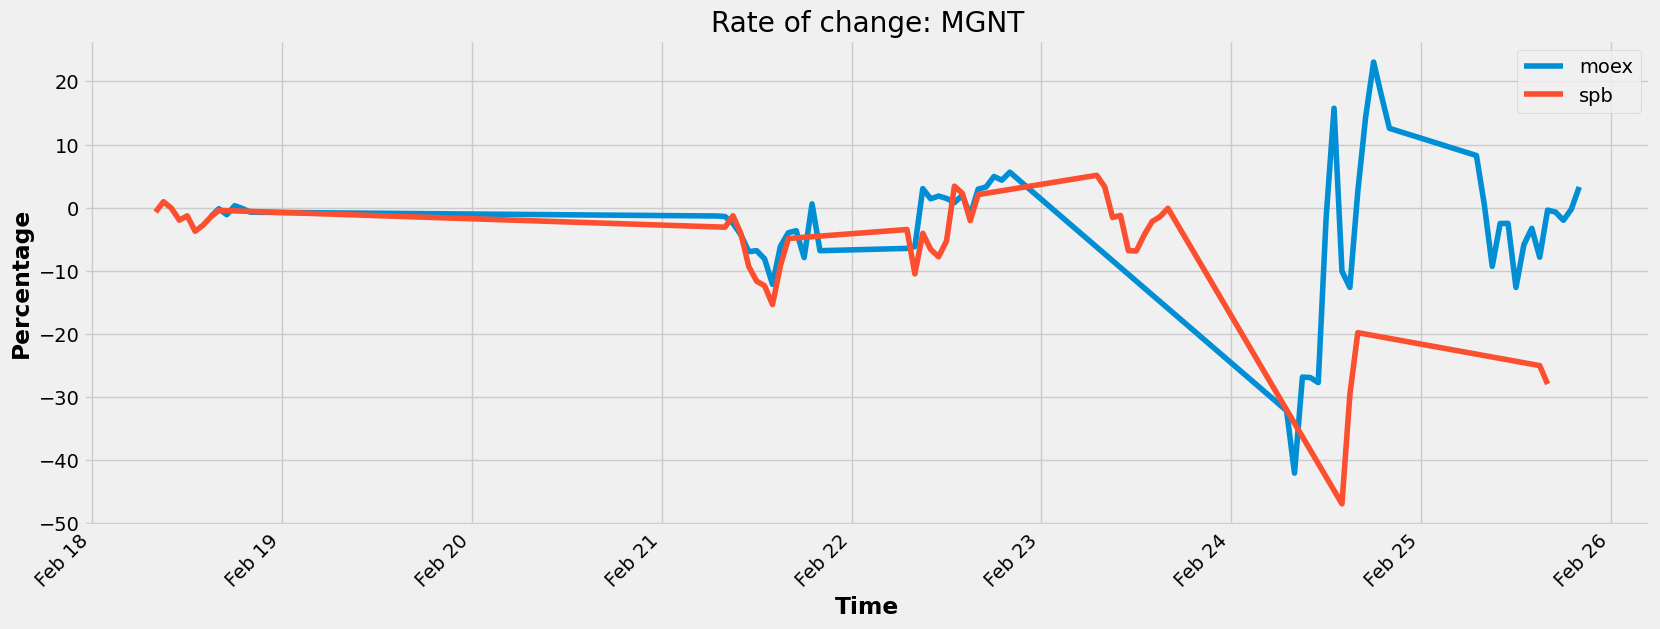

In [187]:
#Rate of Change такова: 100*((Цс-Цn)/ Цn), где Цс — текущая цена, а Цn — цена закрытия n периодов назад
# Если Rate of Change выше нуля, то быки сильны и более целесообразно покупать, если Rate of Change ниже нуля, то у руля медведи и более выгодными будут продажи.
# https://journal.open-broker.ru/trading/roc/
plt.figure(figsize=(18, 6))
n = 190
k = 60
mx['roc']=100 * ((mx['close'] - mx['close'].shift(5)) / (mx['close'].shift(5)))
sp['roc']=100 * ((sp['close'] - sp['close'].shift(5)) / (sp['close'].shift(5)))
#sp['roc']=(sp['close'] / sp['close'].shift(1))-1
plt.plot(mx['time'][n:], mx['roc'][n:], label='moex')
plt.plot(sp['time'][n-k:], sp['roc'][n-k:], label='spb')


plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.title('Rate of change: MGNT')
plt.ylabel('Percentage')
plt.xlabel('Time')

plt.grid(True)
plt.legend()
plt.show()

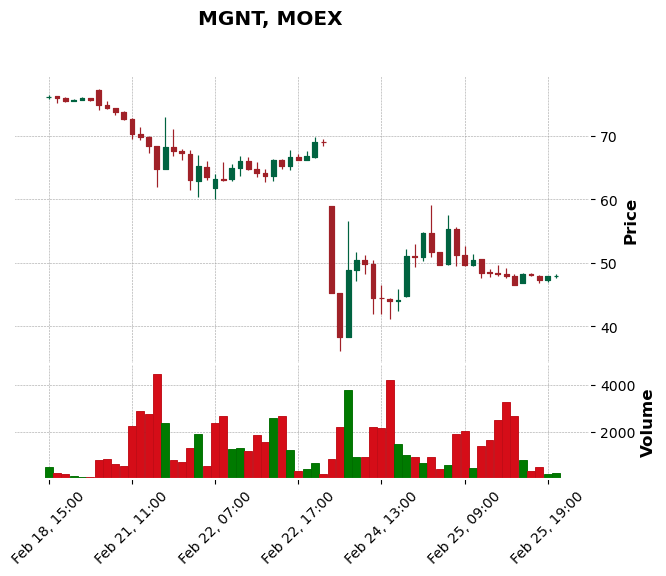

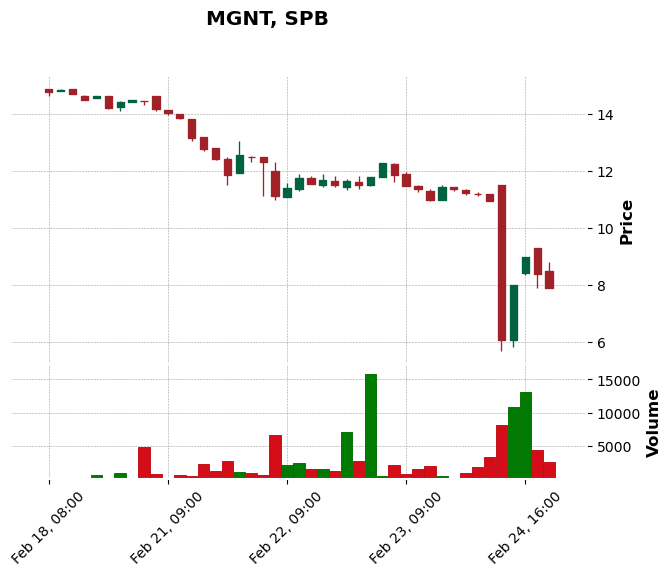

In [190]:
#import matplotlib
#import yfinance as yf
import seaborn as sns
#import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
n = 190
k = 60
df.index = pd.DatetimeIndex(df['time'])
df2.index = pd.DatetimeIndex(df2['time'])
%matplotlib inline
mpf.plot(df[n:], type='candle', title='MGNT, MOEX', volume=True, style='charles')
mpf.plot(df2[n-k:], type='candle', title='MGNT, SPB', volume=True, style='charles')
plt.style.use('fivethirtyeight')  